In [1]:
import pandas as pd, numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [2]:
reviews0 = pd.read_csv("K8 Reviews v0.2.csv")
reviews0.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [178]:
reviews0.sentiment.value_counts(normalize=True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

In [3]:
reviews0.shape

(14675, 2)

In [49]:
print(reviews0.review.sample(1))

1848    No. mobile not upto expectations
Name: review, dtype: object


### Tokenization
- word segmentation
- Splitting reviews into individual words
- Multiple options

In [50]:
txt = "This hotel is awesome."

In [51]:
txt.split()

['This', 'hotel', 'is', 'awesome.']

In [52]:
txt = "This hotel is awesome, isn't it?"

In [53]:
txt.split()

['This', 'hotel', 'is', 'awesome,', "isn't", 'it?']

In [54]:
txt = "Five o'clock is the time to party!"

In [55]:
txt.split()

['Five', "o'clock", 'is', 'the', 'time', 'to', 'party!']

Using `word_tokenize` utility in NLTK

In [56]:
from nltk.tokenize import word_tokenize

In [57]:
txt = "This hotel is awesome, isn't it?"

In [58]:
word_tokenize(txt)

['This', 'hotel', 'is', 'awesome', ',', 'is', "n't", 'it', '?']

In [59]:
from nltk.tokenize import wordpunct_tokenize

In [60]:
wordpunct_tokenize(txt)

['This', 'hotel', 'is', 'awesome', ',', 'isn', "'", 't', 'it', '?']

In [61]:
word_tokenize("this hotel's is awesome, isn't it?")

['this', 'hotel', "'s", 'is', 'awesome', ',', 'is', "n't", 'it', '?']

In [62]:
from nltk.tokenize import TweetTokenizer

In [69]:
tknzr = TweetTokenizer()

In [68]:
txt = "LMAO #kiling it , luv mah lyf :D <3"

In [70]:
tknzr.tokenize(txt)

['LMAO', '#kiling', 'it', ',', 'luv', 'mah', 'lyf', ':D', '<', '3']

#### Regular expression based tokenizer

In [74]:
from nltk.tokenize import regexp_tokenize

In [72]:
message = "Living life king size #lifegoals #chilling #wanderlust #yolo"
pattern = "[\w]+"

In [75]:
regexp_tokenize(message, pattern)

['Living',
 'life',
 'king',
 'size',
 'lifegoals',
 'chilling',
 'wanderlust',
 'yolo']

#### Using Regex, can customize tokenizing for specific tasks
E.g. Extracting hashtags from a tweet

In [76]:
message = "Living life king size #lifegoals #chilling #wanderlust #yolo"
pattern = "#[\w]+"

In [77]:
regexp_tokenize(message, pattern)

['#lifegoals', '#chilling', '#wanderlust', '#yolo']

While there are several options, and you should pick the best for your use-case, we'll go with the word_tokenize method in NLTK 

In [78]:
reviews0.columns

Index(['sentiment', 'review'], dtype='object')

In [80]:
word_tokenize(reviews0.review[0])

['Good', 'but', 'need', 'updates', 'and', 'improvements']

#### Using list comprehension

In [82]:
reviews_tokens = [word_tokenize(sent) for sent in reviews0.review.values]

In [86]:
print(reviews_tokens[:20])

[['Good', 'but', 'need', 'updates', 'and', 'improvements'], ['Worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'Battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'I', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.This', 'is', 'biggest', 'lie', 'from', 'Amazon', '&', 'Lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000MAH', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.Do', "n't", 'know', 'how', 'Lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.Please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.'], ['when', 'I', 'will', 'get', 'my', '10', '%', 'cash', 'back', '...', '.', 'its', 'already', '15', 'January..'], ['Good'], ['The', 'worst', 'phone', 'everThe

## Text pre-processing and clean-up
- let's first explore some techniques

#### Case normalization

In [87]:
txt = "I mustered all my drive, drove to the driving school!"
print(txt)

I mustered all my drive, drove to the driving school!


In [89]:
txt.lower()

'i mustered all my drive, drove to the driving school!'

In [90]:
print(word_tokenize(txt.lower()))

['i', 'mustered', 'all', 'my', 'drive', ',', 'drove', 'to', 'the', 'driving', 'school', '!']


#### Stemming

In [91]:
tokens = word_tokenize(txt)
print(tokens)

['I', 'mustered', 'all', 'my', 'drive', ',', 'drove', 'to', 'the', 'driving', 'school', '!']


In [92]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [93]:
stemmer_p = PorterStemmer()

In [96]:
stemmer_p.stem('drive')

'drive'

In [99]:
print(tokens)

['I', 'mustered', 'all', 'my', 'drive', ',', 'drove', 'to', 'the', 'driving', 'school', '!']


In [98]:
print([stemmer_p.stem(word) for word in tokens])

['I', 'muster', 'all', 'my', 'drive', ',', 'drove', 'to', 'the', 'drive', 'school', '!']


#### Now trying out Snowball stemmer

In [101]:
stemmer_s = SnowballStemmer("english")

In [102]:
print([stemmer_p.stem(word) for word in tokens])

['I', 'muster', 'all', 'my', 'drive', ',', 'drove', 'to', 'the', 'drive', 'school', '!']


Another example

In [103]:
tokens = word_tokenize("he is very methodical and orderly in his execution")

In [104]:
[stemmer_p.stem(word) for word in tokens]

['he', 'is', 'veri', 'method', 'and', 'orderli', 'in', 'hi', 'execut']

In [105]:
[stemmer_s.stem(word) for word in tokens]

['he', 'is', 'veri', 'method', 'and', 'order', 'in', 'his', 'execut']

### Lemmatization

In [106]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahim.baig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

Note: for Lemmatizer to work really well, you'll need to provide the POS tag as well

In [108]:
lemm = WordNetLemmatizer()

In [109]:
lemm.lemmatize('words')

'word'

In [110]:
lemm.lemmatize('drives')

'drive'

In [111]:
lemm.lemmatize('running')

'running'

In [112]:
[lemm.lemmatize(word) for word in "i like petting dogs".split()]

['i', 'like', 'petting', 'dog']

In [113]:
[lemm.lemmatize(word) for word in tokens]

['he', 'is', 'very', 'methodical', 'and', 'orderly', 'in', 'his', 'execution']

### Tokenizing and Normalizing case on our data

In [117]:
reviews_tokens = [word_tokenize(sent.lower()) for sent in reviews0.review.values]

In [118]:
print(reviews_tokens[:10])

[['good', 'but', 'need', 'updates', 'and', 'improvements'], ['worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.'], ['when', 'i', 'will', 'get', 'my', '10', '%', 'cash', 'back', '...', '.', 'its', 'already', '15', 'january..'], ['good'], ['the', 'worst', 'phone', 'everthe

### Plotting the most common terms in the dataset

Need to get all tokens in one list

In [119]:
reviews_tokens[0]

['good', 'but', 'need', 'updates', 'and', 'improvements']

In [120]:
all_terms = []

for sent in reviews_tokens:
    all_terms.extend(sent)

In [121]:
print(all_terms[:50])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at']


In [122]:
from nltk.probability import FreqDist

In [123]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13584, 'is': 10386, ',': 6890, 'phone': 6566, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

In [124]:
fdist.most_common(10)

[('.', 13584),
 ('is', 10386),
 (',', 6890),
 ('phone', 6566),
 ('the', 6526),
 ('not', 6030),
 ('good', 5717),
 ('and', 5413),
 ('it', 5375),
 ('to', 4697)]

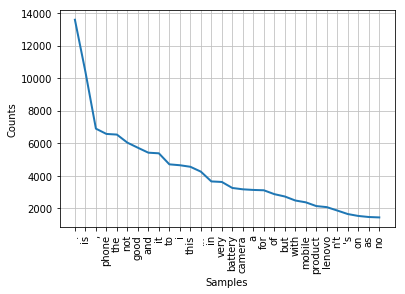

In [125]:
fdist.plot(30,cumulative=False)
plt.show()

### Removing stop words

In [126]:
from string import punctuation
from nltk.corpus import stopwords

In [127]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [128]:
stop_nltk = stopwords.words("english")
len(stop_nltk)

179

In [129]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Let's also remove punctuations by adding them to our effective stop words list

In [130]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [132]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [133]:
stop_updated = stop_nltk + list(punctuation) + ["..."]
len(stop_updated)

212

Removing from a sample text

In [136]:
tok = word_tokenize("i dont care, man`")
tok

['i', 'dont', 'care', ',', 'man', '`']

In [137]:
[term for term in tok if term not in stop_updated]

['dont', 'care', 'man']

##### Removing terms from the updated list

In [138]:
def del_stop(sent):
    return [term for term in sent if term not in stop_updated]

In [140]:
reviews_tokens2 = [del_stop(sent) for sent in reviews_tokens]
reviews_tokens2[:5]

[['good', 'need', 'updates', 'improvements'],
 ['worst',
  'mobile',
  'bought',
  'ever',
  'battery',
  'draining',
  'like',
  'hell',
  'backup',
  '6',
  '7',
  'hours',
  'internet',
  'uses',
  'even',
  'put',
  'mobile',
  'idle',
  'getting',
  'discharged.this',
  'biggest',
  'lie',
  'amazon',
  'lenove',
  'expected',
  'making',
  'full',
  'saying',
  'battery',
  '4000mah',
  'booster',
  'charger',
  'fake',
  'takes',
  'least',
  '4',
  '5',
  'hours',
  'fully',
  'charged.do',
  "n't",
  'know',
  'lenovo',
  'survive',
  'making',
  'full',
  'us.please',
  'go',
  'else',
  'regret',
  'like'],
 ['get', '10', 'cash', 'back', 'already', '15', 'january..'],
 ['good'],
 ['worst',
  'phone',
  'everthey',
  'changed',
  'last',
  'phone',
  'problem',
  'still',
  'amazon',
  'returning',
  'phone',
  '.highly',
  'disappointing',
  'amazon']]

## Phrasing

Terms that occur together more than you expect them to by chance - 
- "air india", "ice hockey", "kuala lumpur" "new delhi"

In [141]:
from gensim.models.phrases import Phraser, Phrases

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#### Assessing phrases on a larger corpus

In [142]:
#nltk.download('gutenberg')
from nltk.corpus import gutenberg

In [143]:
gut_sents = gutenberg.sents()

In [145]:
gut_clean = []
for sent in gut_sents:
    res = [term.lower() for term in sent if term not in stop_updated]
    res = del_stop(res)
    gut_clean.append(res)

In [146]:
gut_clean[:5]

[['emma', 'jane', 'austen', '1816'],
 ['volume'],
 ['chapter'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'rich',
  'comfortable',
  'home',
  'happy',
  'disposition',
  'seemed',
  'unite',
  'best',
  'blessings',
  'existence',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'world',
  'little',
  'distress',
  'vex'],
 ['youngest',
  'two',
  'daughters',
  'affectionate',
  'indulgent',
  'father',
  'consequence',
  'sister',
  'marriage',
  'mistress',
  'house',
  'early',
  'period']]

In [147]:
bigram_gut = Phraser(Phrases(gut_clean))

In [148]:
bigram_gut.phrasegrams

{(b'two', b'daughters'): (20, 13.363678462850654),
 (b'long', b'ago'): (39, 68.68662622547201),
 (b'sixteen', b'years'): (15, 147.93917671337024),
 (b'miss', b'taylor'): (48, 473.24877181641887),
 (b'mr', b'woodhouse'): (132, 117.28850274196262),
 (b'passed', b'away'): (25, 13.227686080433829),
 (b'mr', b'weston'): (162, 103.14377797499614),
 (b'five', b'years'): (42, 42.39565046949423),
 (b'years', b'old'): (176, 54.70408288368016),
 (b'seven', b'years'): (55, 59.01828858246154),
 (b'well', b'informed'): (8, 15.96694253628115),
 (b'find', b'fault'): (9, 38.28852532748637),
 (b'half', b'mile'): (15, 110.96884572769342),
 (b'mrs', b'weston'): (249, 203.37454349635286),
 (b'sixteen', b'miles'): (6, 118.2357638888889),
 (b'emma', b'could'): (61, 12.25359175736826),
 (b'every', b'body'): (148, 44.193064948831605),
 (b'great', b'deal'): (182, 124.00852416517499),
 (b'good', b'humoured'): (30, 167.80121224067415),
 (b'three', b'times'): (41, 42.9360933067143),
 (b'last', b'night'): (70, 26.1

##### Increasing the threshold to 50

In [151]:
bigram_gut = Phraser(Phrases(gut_clean, min_count=20, threshold=80))

In [152]:
bigram_gut.phrasegrams

{(b'miss', b'taylor'): (48, 308.16199095022625),
 (b'mr', b'woodhouse'): (132, 103.43552997716387),
 (b'mr', b'weston'): (162, 93.2892768945825),
 (b'mrs', b'weston'): (249, 190.8720100846918),
 (b'great', b'deal'): (182, 113.49932720202457),
 (b'mr', b'knightley'): (277, 190.97634655924165),
 (b'half', b'hour'): (73, 86.0371989473885),
 (b'miss', b'woodhouse'): (173, 279.7508900045641),
 (b'years', b'ago'): (56, 125.47720747416746),
 (b'mr', b'elton'): (214, 145.65891120763786),
 (b'dare', b'say'): (117, 118.31453860316505),
 (b'frank', b'churchill'): (151, 1631.2436553792145),
 (b'miss', b'bates'): (113, 357.20790705543965),
 (b'drawing', b'room'): (49, 163.05149924047288),
 (b'mrs', b'goddard'): (58, 236.20605496381077),
 (b'make', b'atonement'): (65, 151.00620842572062),
 (b'young', b'ladies'): (47, 80.60469214381526),
 (b'old', b'fashioned'): (38, 111.1465278848159),
 (b'miss', b'smith'): (58, 120.15155763963044),
 (b'harriet', b'smith'): (31, 81.79654095604131),
 (b'robert', b'ma

In [153]:
bigram_gut['He sat in the drawing room'.split()]

['He', 'sat', 'in', 'the', 'drawing_room']

#### Assessing the phrases in our data

In [154]:
phrases = Phrases(reviews_tokens2)

In [155]:
bigram = Phraser(phrases)

In [156]:
bigram.phrasegrams

{(b'battery', b'draining'): (140, 24.60182588597843),
 (b'like', b'hell'): (18, 40.333761804826864),
 (b'6', b'7'): (11, 46.35654559707343),
 (b'7', b'hours'): (17, 41.464648825522964),
 (b'4', b'5'): (17, 12.711616659202866),
 (b'5', b'hours'): (40, 35.864538208282795),
 (b"n't", b'know'): (73, 30.059308097117572),
 (b'10', b'cash'): (7, 34.83681885125184),
 (b'cash', b'back'): (32, 139.72071756727195),
 (b'lenovo', b'k8'): (567, 32.221337692317384),
 (b'k8', b'note'): (704, 66.4291124349742),
 (b'lenovo', b'k'): (23, 12.715260979411921),
 (b'k', b'8'): (18, 129.12765600067186),
 (b'service', b'station'): (8, 61.343879668049794),
 (b'dont', b'buy'): (91, 39.2145225464191),
 (b'better', b'go'): (27, 11.000604577028609),
 (b'within', b'2'): (20, 18.840962192013592),
 (b'2', b'months'): (37, 32.581542699724515),
 (b'battery', b'life'): (251, 26.844307686629822),
 (b'8', b'months'): (14, 27.428339517625233),
 (b'every', b'time'): (24, 16.55102341442576),
 (b'draining', b'quickly'): (15, 4

In [ ]:
?Phrases

Increasing the threshold

In [157]:
bigram = Phraser(Phrases(reviews_tokens2, min_count=20, threshold=50))

In [158]:
bigram.phrasegrams

{(b'cash', b'back'): (32, 62.0980966965653),
 (b'k8', b'note'): (704, 65.00359500074728),
 (b'call', b'recording'): (112, 132.16563016227772),
 (b'usb', b'cable'): (22, 85.89034132171388),
 (b'value', b'money'): (176, 125.20545602605863),
 (b'ca', b"n't"): (223, 57.43096041143404),
 (b'sd', b'card'): (41, 288.1980737990253),
 (b'4000', b'mah'): (92, 505.43162393162396),
 (b'fully', b'charged'): (33, 100.02101223002862),
 (b'turbo', b'charger'): (150, 87.20071460980037),
 (b'call', b'recorder'): (52, 104.71093404161134),
 (b'third', b'class'): (25, 162.46016483516485),
 (b'stock', b'android'): (116, 261.083885209713),
 (b'service', b'centre'): (81, 159.23304935110798),
 (b'deca', b'core'): (65, 694.0786384976526),
 (b'core', b'processor'): (55, 133.54900632339655),
 (b'upto', b'mark'): (44, 164.78021595262976),
 (b'dolby', b'atmos'): (120, 329.20725936647557),
 (b'waste', b'money'): (137, 65.8976084347677),
 (b'4gb', b'ram'): (65, 187.79798870853918),
 (b'price', b'range'): (181, 60.374

In [159]:
bigram["phone", "gets", "heated", "very", "quickly"]

['phone', 'gets_heated', 'very', 'quickly']

## Over to the predictive modeling part

In [160]:
" ".join(["this", "string", "is", "broken"])

'this string is broken'

In [161]:
X = [" ".join(sent) for sent in reviews_tokens2]
y = reviews0.sentiment.values

In [162]:
X[:5]

['good need updates improvements',
 "worst mobile bought ever battery draining like hell backup 6 7 hours internet uses even put mobile idle getting discharged.this biggest lie amazon lenove expected making full saying battery 4000mah booster charger fake takes least 4 5 hours fully charged.do n't know lenovo survive making full us.please go else regret like",
 'get 10 cash back already 15 january..',
 'good',
 'worst phone everthey changed last phone problem still amazon returning phone .highly disappointing amazon']

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

### Bag of words representation

In [164]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [165]:
?CountVectorizer

In [166]:
vectorizer = CountVectorizer(max_features = 2500)

In [167]:
X_train_bow = vectorizer.fit_transform(X_train)

In [168]:
X_test_bow = vectorizer.transform(X_test)

In [169]:
X_train_bow.shape, X_test_bow.shape

((10272, 2500), (4403, 2500))

### Model building

In [170]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [171]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [172]:
classifier = GaussianNB()

In [173]:
classifier.fit(X_train_bow.toarray(), y_train)

GaussianNB(priors=None)

In [174]:
y_pred_train = classifier.predict(X_train_bow.toarray())

In [175]:
accuracy_score(y_pred_train, y_train)

0.6695872274143302

##### Accuracy on the test set

In [176]:
y_pred_test = classifier.predict(X_test_bow.toarray())

In [177]:
accuracy_score(y_pred_test, y_test)

0.628889393595276

#### Multinomial Naive Bayes

In [179]:
from sklearn.naive_bayes import MultinomialNB

In [180]:
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train_bow.toarray(), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [181]:
y_pred_train = classifier_MNB.predict(X_train_bow.toarray())

In [182]:
accuracy_score(y_pred_train, y_train)

0.8590342679127726

##### Accuracy on the test set

In [183]:
y_pred_test = classifier_MNB.predict(X_test_bow.toarray())

In [184]:
accuracy_score(y_pred_test, y_test)

0.8471496706790824